
# Selecting BornhuetterFerguson Apriori

In [2]:
import chainladder as cl
import pandas as pd


This example demonstrates how you can can use the output of one method as the
apriori selection for the Bornhuetter-Ferguson Method.

We use basic arithmetic to build up an Apriori rather than initializing it explicitely with `cl.Triangle`

In [9]:
# Create Aprioris as the mean AY chainladder ultimate
raa = cl.load_sample('RAA')

cl_ult = cl.Chainladder().fit(raa).ultimate_  # Chainladder Ultimate
apriori = cl_ult * 0 + (cl_ult.sum() / 10)  # Mean Chainladder Ultimate
bf_ult = cl.BornhuetterFerguson(apriori=1).fit(raa, sample_weight=apriori).ultimate_

output = pd.concat(
    (cl_ult.to_frame().rename({'2261': 'Chainladder'}, axis=1),
     bf_ult.to_frame().rename({'2261': 'BornhuetterFerguson'}, axis=1)),
    axis=1)

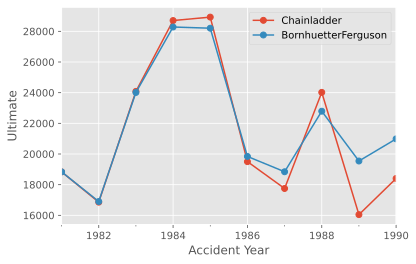

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot of Ultimates

ax = output.plot(grid=True, marker='o', 
    xlabel='Accident Year', ylabel='Ultimate');

In [11]:
from myst_nb import glue
glue("plot_bf_apriori_from_cl", ax.get_figure(), display=False)